In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Problem Statement

Predict CTR of an Email Campaign

Can you predict the Click Through Rate (CTR) of an email campaign?

Problem Statement

Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.


Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).


CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.


CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered

CTR depends on multiple factors like design, content, personalization, etc. 

    How do you design the email content effectively?
    What should your subject line look like?
    What should be the length of the email?
    Do you need images in your email template?

As a part of the Data Science team, in this hackathon, you will build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.



## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__
    
* __Create a Submission file__


### Step 1: Importing the Relevant Libraries








In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [ ]:
train_path = r"/content/drive/MyDrive/Jobathon/5 8 22/train_F3fUq2S.csv"
df = pd.read_csv(train_path)
test_path = r"/content/drive/MyDrive/Jobathon/5 8 22/test_Bk2wfZ3.csv"
df1 = pd.read_csv(test_path)
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [ ]:
df.shape,df1.shape

((1888, 22), (762, 21))

* __We have 1888 rows and 22 columns in Train set whereas Test set has 762 rows and 21 columns.__

In [ ]:
df.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [ ]:
df.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

*   So there is no any null value in any column.

In [ ]:
#categorical features
categorical = df.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 1
Numerical Features in Train Set: 21


*   So there is one categorical feature column 'times_of_day' which we has to handle.


In [ ]:
df.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


*   As subject_len, body_len & mean_paragraph_len has higher std number than others so we has to handle this.
*   is_timer column has all value zero so we can drop this column.





In [ ]:
df['is_price'].value_counts()

0        1875
5499        5
8000        2
5000        2
4999        1
1399        1
1000        1
14999       1
Name: is_price, dtype: int64



*  is_price doesn't justify much since all the values are almost zero. its better if we drop it. or may be we can create boolean variable




### __Step 3: Data Cleaning__

### Useful function

In [ ]:
# Useful function
def drop_columns(dataframe):
  # As 'campaign_id', 'sender','is_timer' has no correlation with click rate so we can remove this & 'times_of_day' is bcs 
  # we has it to categorical variable 
  dataframe = dataframe.drop(['campaign_id','is_timer','times_of_day'], axis=1)
  return dataframe

def replace_1(x):
  if x == 0:
    return x
  else:
    return 1  

def clean_df(dataframe):

  dataframe = drop_columns(dataframe)     
  dataframe["is_price"] = dataframe["is_price"].apply(replace_1)
  dataframe["subject_len"] = dataframe["subject_len"].apply(lambda x: x/dataframe.subject_len.mean())
  dataframe["body_len"] = dataframe["body_len"].apply(lambda x: x/dataframe.body_len.mean())
  dataframe["mean_paragraph_len"] = dataframe["mean_paragraph_len"].apply(lambda x: x/dataframe.mean_paragraph_len.mean())
  return dataframe

*  One Hot Encoding of 'times_of_day' column.

In [ ]:
def dummy(dataframe):
  dummy_times_of_day = pd.get_dummies(dataframe['times_of_day'])

  dataframe= pd.merge(
      left=dataframe,
      right=dummy_times_of_day,
      left_index=True,
      right_index=True,
  )
  return dataframe

In [ ]:
## label_encoder object
# label_encoder =LabelEncoder()
# Encode labels in column. 
# df['times_of_day']= label_encoder.fit_transform(df['times_of_day'])
# df.head(10)

In [ ]:
# Now calling each function one by one

df_OneHotEncoded = dummy(df)
df_removed_col = clean_df(df_OneHotEncoded)
df_removed_col.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,...,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Evening,Morning,Noon
0,3,0.881197,0.735878,1.106716,5,1,6,26,3,29,...,0,0,0,0,0,14,0.103079,0,0,1
1,3,0.626114,0.181167,7.264594,5,1,2,11,0,22,...,0,0,0,0,0,10,0.700000,0,1,0
2,3,0.684087,0.902383,0.454037,5,1,2,11,3,23,...,1,0,0,0,0,16,0.002769,0,0,1
3,3,0.858008,0.778033,0.851320,4,0,15,9,4,24,...,0,0,0,0,0,10,0.010868,1,0,0
4,3,0.927576,0.705707,0.766188,5,1,6,26,3,31,...,1,0,0,0,0,14,0.142826,0,0,1


categorical_columns = ['Gender', 'House Type']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
print(df)

### __Step 4: Exploratory Data Analysis__

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [ ]:
df['times_of_day'].value_counts()

Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64

In [ ]:
df['sender'].value_counts()

3     1559
10     181
15      89
6       22
9       13
14       7
11       7
0        3
12       3
7        2
2        1
1        1
Name: sender, dtype: int64

*   As most of the sender are 3,10,15,6 & 9.






In [ ]:
train_df.subject_len.hist(bins=100)

* **Correlation**








(21.5, -0.5)

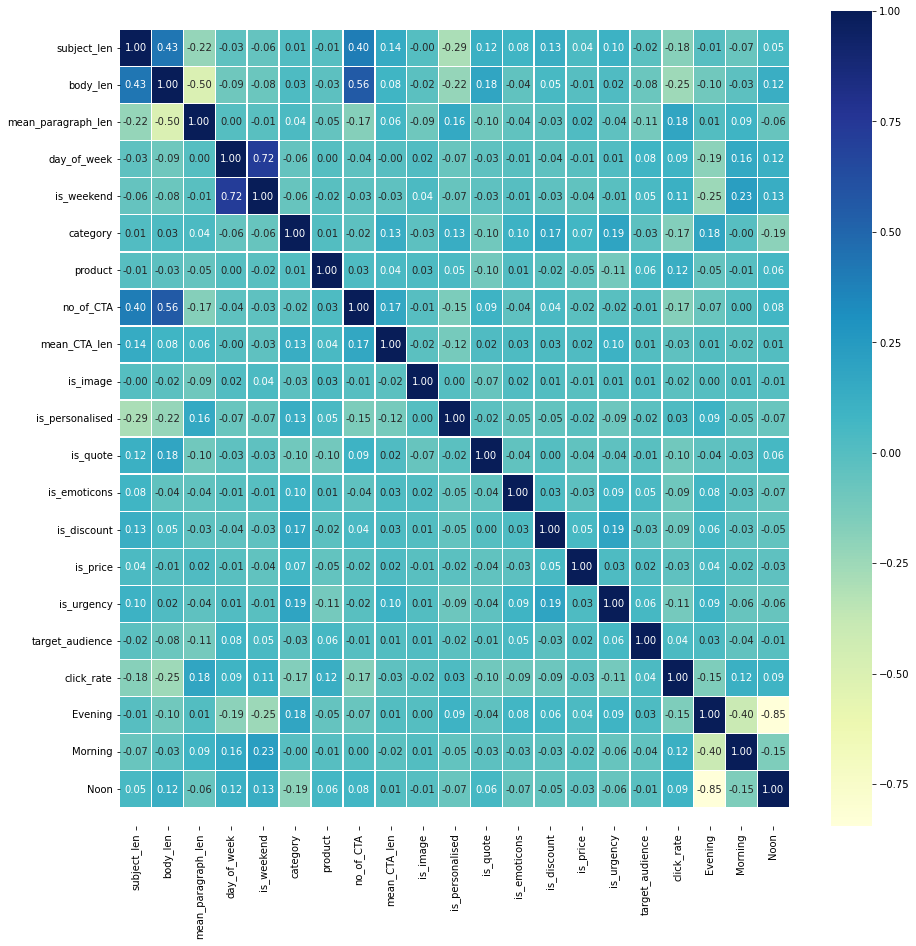

In [ ]:
corr_matrix = df_removed_col.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

* Doing correlation operation to check which column affect the click rate.

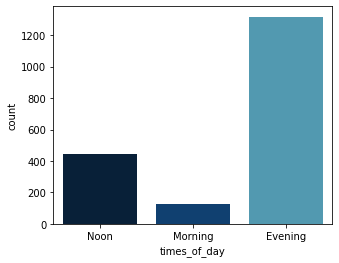

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot('times_of_day',data=df,palette='ocean')

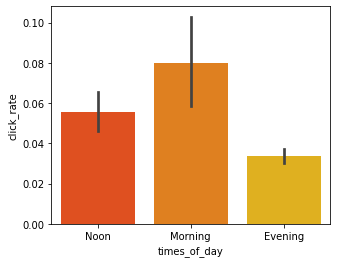

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(y='click_rate',x='times_of_day',data=df,palette='autumn')

* So during morning the click rate is higher.

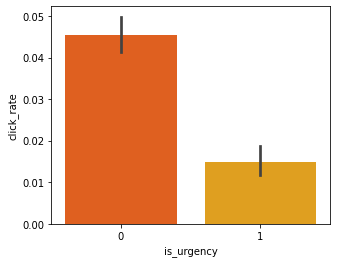

In [ ]:
plt.figure(figsize=(5,4))

sns.barplot(y='click_rate',x='is_urgency',data=df,palette='autumn')

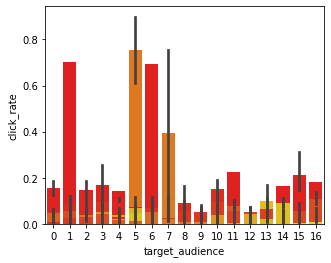

In [ ]:
plt.figure(figsize=(5,4))
continous_val = ['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience']

for col in continous_val:
  sns.barplot(y='click_rate',x=col,data=df,palette='autumn')




In [ ]:
train_df.mean_CTA_len.hist(bins=100)

### __Step 5: Building Model__

In [ ]:
# Seperate Features and Target
X= df_removed_col.drop(columns = ['click_rate'], axis=1)
y= df_removed_col['click_rate']

In [ ]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xg

In [ ]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),RandomForestRegressor(),SVR(),xg.XGBRegressor(),GradientBoostingRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor','RandomForestRegressor','SVR','XGB','gb regressor']




In [ ]:
rmse_list = []
mae_list = []
rmse_list_train = []
mae_list_train = []

for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)

    MSE= metrics.mean_squared_error(y_valid,y_pred)
    MAE= metrics.mean_absolute_error(y_valid,y_pred)   
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    mae_list.append(MAE)

    Y_pred_train = model.predict(X_train)
    MSE_train= metrics.mean_squared_error(y_train,Y_pred_train)
    MAE_train= metrics.mean_absolute_error(y_train,Y_pred_train)
    rmse_train = np.sqrt(MSE_train)
    rmse_list_train.append(rmse_train)
    mae_list_train.append(MAE_train)
   


[18:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
evaluation = pd.DataFrame({'Model': names,'RMSE_train': rmse_list_train,'MAE_test_train':mae_list_train,
                           'RMSE_test': rmse_list,'MAE_test':mae_list})
evaluation

,Model,RMSE_train,MAE_test_train,RMSE_test,MAE_test
0,Linear Regression,0.077278,0.044869,0.078340,0.045971
1,Ridge Regression,0.077278,0.044855,0.078337,0.045953
2,Lasso Regression,0.084149,0.047367,0.084410,0.047743
3,K Neighbors Regressor,0.060367,0.028743,0.076483,0.037334
4,Decision Tree Regressor,0.000612,0.000025,0.081730,0.038422
5,RandomForestRegressor,0.022709,0.011500,0.062357,0.033129
6,SVR,0.087521,0.069869,0.088165,0.070996
7,XGB,0.046752,0.026257,0.064964,0.035833
8,gb regressor,0.044955,0.025520,0.062973,0.035445


* _train means accuracy on train data 
* _test means accuracy on test data 
* rmse : root mean square error
* mae : mean absolute error

**So K Neighbors Regressor, RandomForestRegressor & SVR performing well.** 

***So checking by Cross validation that the model is regularise well or not.***

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

print("Random Forest    : ",cross_val_score(RandomForestRegressor(),X,y,cv=cv,scoring='r2'))
print("KNeighborsRegressor   : ",cross_val_score(KNeighborsRegressor(),X,y,cv=cv,scoring='r2'))
print("SVR     : " ,cross_val_score(SVR(),X,y,cv=cv,scoring='r2'))
print("Ridge Regression     : " ,cross_val_score(Ridge(),X,y,cv=cv,scoring='r2'))
print("DecisionTreeRegressor     : " ,cross_val_score(DecisionTreeRegressor(),X,y,cv=cv,scoring='r2'))
print("SVR     : " ,cross_val_score(SVR(),X,y,cv=cv,scoring='r2'))

Random Forest    :  [0.41188187 0.57137242 0.46568674 0.42266164 0.42730115]
KNeighborsRegressor   :  [0.12987514 0.26654986 0.18876645 0.15286108 0.17895706]
SVR     :  [-0.17166786 -0.18415431 -0.06188223 -0.11474072 -0.06683828]
Ridge Regression     :  [0.15700118 0.17934897 0.09373691 0.14396524 0.1090091 ]
DecisionTreeRegressor     :  [ 0.12803404  0.256795    0.28892973 -0.18675998  0.09200954]
SVR     :  [-0.17166786 -0.18415431 -0.06188223 -0.11474072 -0.06683828]


In [ ]:
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        
        'KNeighborsRegressor': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [1,2,3,4,5,6,7],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'weights' : ['uniform', 'distance']
            }
        },
        'SVR': {
            'model': SVR(),
            'params': {
                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                'gamma': ['scale', 'auto'],
                'C' : [0.1,1,5,10]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

In [ ]:
'RandomForestRegressor' : {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10,20,50,100,120],
                'criterion': ['squared_error', 'absolute_error', 'poisson'],
                'max_depth' : [10,15,20],
                'max_features' : ['sqrt', 'log2','auto']
            }
        },

In [ ]:
campaign_id= []
campaign_id = df1['campaign_id']
df1 = dummy(df1)
df1 = clean_df(df1)
df1.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,Evening,Morning,Noon
0,3,0.705127,0.907414,0.331475,6,1,6,26,3,37,...,0,0,1,0,0,0,14,0,0,1
1,3,0.624211,0.181116,7.714320,5,1,2,11,0,22,...,0,0,0,0,0,0,10,0,1,0
2,3,1.017233,0.103847,2.350457,4,0,2,11,0,22,...,0,1,0,0,0,0,10,1,0,0
3,3,1.017233,0.103847,2.350457,3,0,2,11,0,22,...,0,1,0,0,0,0,10,1,0,0
4,3,0.901638,0.635916,0.873888,3,0,6,26,2,40,...,0,0,0,0,0,0,14,0,0,1


In [ ]:
model = RandomForestRegressor()
model.fit(X, y)
final_predictions = model.predict(df1)
dict1 = {'campaign_id':campaign_id , 'click_rate':final_predictions}
final=pd.DataFrame(dict1)
final.head()

,campaign_id,click_rate
0,1889,0.058571
1,1890,0.597427
2,1891,0.176454
3,1892,0.186574
4,1893,0.119046


Approach 2 to combine multiple algos

In [ ]:
X.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA',
       'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience', 'Evening', 'Morning', 'Noon'],
      dtype='object')

In [ ]:
model = RandomForestRegressor()
model.fit(X, y)
final_predictions = model.predict(df1)
model1 =xg.XGBRegressor()
model1.fit(X, y)
final_predictions1 = model1.predict(df1)

model2 =GradientBoostingRegressor()
model2.fit(X, y)
final_predictions2 = model2.predict(df1)
dict1 = {'campaign_id':campaign_id , 'click_rate_rf':final_predictions,
         'click_rate_xgb':final_predictions1,'click_rate_gb_reg':final_predictions2}
final=pd.DataFrame(dict1)
final.head()

[18:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,campaign_id,click_rate_rf,click_rate_xgb,click_rate_gb_reg
0,1889,0.056655,0.050543,0.046859
1,1890,0.601928,0.555179,0.622487
2,1891,0.199404,0.208486,0.233181
3,1892,0.208616,0.208486,0.233181
4,1893,0.118256,0.084162,0.083319


In [ ]:
final.describe()

,campaign_id,click_rate_rf,click_rate_xgb,click_rate_gb_reg
count,762.000000,762.000000,762.000000,762.000000
mean,2269.500000,0.043645,0.040485,0.040533
std,220.114743,0.059086,0.052897,0.053773
min,1889.000000,0.003472,-0.012594,-0.014181
25%,2079.250000,0.011965,0.011460,0.011051
50%,2269.500000,0.021414,0.024760,0.024870
75%,2459.750000,0.047195,0.052848,0.051612
max,2650.000000,0.601928,0.555179,0.622487


In [ ]:
final['click_rate'] = ( final['click_rate_xgb'] + final['click_rate_rf']+ final['click_rate_gb_reg'])/3
final.head()

,campaign_id,click_rate_rf,click_rate_xgb,click_rate_gb_reg,click_rate
0,1889,0.056655,0.050543,0.046859,0.051352
1,1890,0.601928,0.555179,0.622487,0.593198
2,1891,0.199404,0.208486,0.233181,0.213690
3,1892,0.208616,0.208486,0.233181,0.216761
4,1893,0.118256,0.084162,0.083319,0.095246


In [ ]:
final = final.drop(['click_rate_xgb', 'click_rate_rf','click_rate_gb_reg'], axis=1)
final.head()

,campaign_id,click_rate
0,1889,0.051352
1,1890,0.593198
2,1891,0.213690
3,1892,0.216761
4,1893,0.095246


In [ ]:
final.to_csv('result4.csv',index = False)

Approach 3